# Code Reference:

###### The following code has been produced based on the code presented in:
- https://www.kaggle.com/yevonnaelandrew/automated-text-classification-with-pycaret

## Importing the required python libraries!

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import string
import nltk

"""it runs only once!"""
nltk.download('stopwords')

from nltk.corpus import stopwords
from string import punctuation

# Construct English stopwords list!
eng_stopwords = stopwords.words('english') + list(punctuation)

# Extend the list by adding additional stopwords to remove!
eng_stopwords.extend(['from', 'subject', 're', 'edu', 'use'])


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\oalan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# Feature extraction

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

## Loading the data

In [4]:
df = pd.read_csv(r"..\data\title_df.csv")
df.shape

(44898, 3)

In [5]:
df.head()

,Unnamed: 0,title,isreal
0,0,"As U.S. budget fight looms, Republicans flip t...",1
1,1,U.S. military to accept transgender recruits o...,1
2,2,Senior U.S. Republican senator: 'Let Mr. Muell...,1
3,3,FBI Russia probe helped by Australian diplomat...,1
4,4,Trump wants Postal Service to charge 'much mor...,1


In [6]:
df.tail()

,Unnamed: 0,title,isreal
44893,44893,McPain: John McCain Furious That Iran Treated ...,0
44894,44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,0
44895,44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,0
44896,44896,How to Blow $700 Million: Al Jazeera America F...,0
44897,44897,10 U.S. Navy Sailors Held by Iranian Military ...,0


In [7]:
df.columns

Index(['Unnamed: 0', 'title', 'isreal'], dtype='object')

In [8]:
if 'Unnamed: 0' in df.columns:
    del df['Unnamed: 0']

In [9]:
df["category"]= np.where(df['isreal'] == 1, "real", "fake")

In [10]:
df.head()

,title,isreal,category
0,"As U.S. budget fight looms, Republicans flip t...",1,real
1,U.S. military to accept transgender recruits o...,1,real
2,Senior U.S. Republican senator: 'Let Mr. Muell...,1,real
3,FBI Russia probe helped by Australian diplomat...,1,real
4,Trump wants Postal Service to charge 'much mor...,1,real


In [11]:
df.tail()

,title,isreal,category
44893,McPain: John McCain Furious That Iran Treated ...,0,fake
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,0,fake
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,0,fake
44896,How to Blow $700 Million: Al Jazeera America F...,0,fake
44897,10 U.S. Navy Sailors Held by Iranian Military ...,0,fake


In [12]:
### shuffle thr dataframe in-place and reset the index!!!

df.sample(frac=1).reset_index(drop=True)

,title,isreal,category
0,An ANGRY Morning Joe SKEWERS Trump Minion Gen...,0,fake
1,VACATIONING LAME-DUCK OBAMA Ready To Announce ...,0,fake
2,WATCH: Trump Stumbles When Asked If He Would ...,0,fake
3,Woman Arrested For DWI Has Jaw-Droppingly Stu...,0,fake
4,PARANOID OR SMART? WHAT FACEBOOK’S CEO Does To...,0,fake
...,...,...,...
44893,HILLARY APPROVED? BILL CLINTON Ditched Secret ...,0,fake
44894,Mexico arrests former high-ranking PRI officia...,1,real
44895,"Trump, Putin discuss Syria ceasefire in first ...",1,real
44896,Prosecutor at war crimes court to seek investi...,1,real


In [13]:
"""
if 'isreal' in df.columns:
    del df['isreal']
"""

"\nif 'isreal' in df.columns:\n    del df['isreal']\n"

In [14]:
df.describe()

,isreal
count,44898.000000
mean,0.477015
std,0.499477
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


## PyCaret Part:

In [15]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
from pycaret.utils import version

version()

'2.3.5'

In [17]:
### Due to memory limitations!

df_sub = df.sample(n=2500)
df_sub.shape

(2500, 3)

In [18]:
df_sub.head()

,title,isreal,category
23747,President Obama To Receive Distinguished ‘Pro...,0,fake
18841,Rising tension spurs Malaysia to ban travel to...,1,real
37189,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,0,fake
39477,Democrats Won’t Have A Chance in 2018 Unless T...,0,fake
7458,Republicans defend grip on U.S. Congress as Tr...,1,real


In [19]:
df_sub.tail()

,title,isreal,category
9117,"Clinton wins D.C. primary, has 'positive' meet...",1,real
24161,WATCH: Jon Stewart Joins Colbert To HUMILIATE...,0,fake
26266,WATCH: White Racist Tells Black Quarterback T...,0,fake
36672,ARE JEB’S DONORS THROWING IN THE TOWEL?,0,fake
10201,Jeb Bush endorses Ted Cruz for Republican nomi...,1,real


In [20]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 23747 to 10201
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     2500 non-null   object
 1   isreal    2500 non-null   int64 
 2   category  2500 non-null   object
dtypes: int64(1), object(2)
memory usage: 78.1+ KB


<AxesSubplot:xlabel='count', ylabel='isreal'>

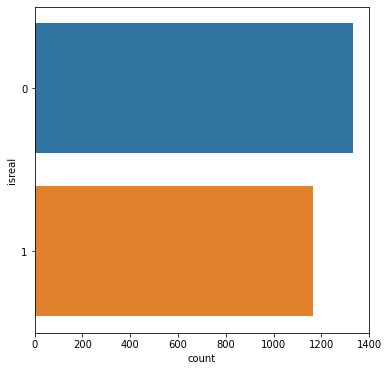

In [21]:
plt.figure(figsize = (6, 6))
sns.countplot(y = "isreal", data = df_sub)

<hr style="height:10px">

In [22]:
from pycaret.classification import *

<hr style="height:10px">

### Feature-engineering: Try PyCaret using BoW and TF-IDF approach!

#### Try PyCaret  with BoW : itc auses/shows memory related run-time python erros - even with 5k set!

In [23]:
"""
%time setup = setup(data=BoW_df, target='target_cat', session_id=123, train_size = 0.7, fold=2, silent=True)

cv = CountVectorizer(lowercase = True, stop_words = eng_stopwords, token_pattern="[A-Za-z]+")
BoW = cv.fit_transform(df_sub['title']) #scipy.sparse.csr.csr_matrix

## Old: wihout dtype
#BoW_df = pd.DataFrame(BoW.toarray(), columns=cv.get_feature_names())
BoW_df = pd.DataFrame(BoW.toarray(), columns=cv.get_feature_names(), dtype='uint8')

BoW_df['target_cat'] = df_sub.reset_index().category.map({'fake':1, 'real':0})

#Quicker
BoW_df.describe #BoW_df.describe()
#check if this helps
#BoW_df['target_cat'] = BoW_df['target_cat'].astype("uint8")
BoW_df['target_cat'] = BoW_df['target_cat'].astype(np.uint8)


BoW_df.info()

"""

'\n%time setup = setup(data=BoW_df, target=\'target_cat\', session_id=123, train_size = 0.7, fold=2, silent=True)\n\ncv = CountVectorizer(lowercase = True, stop_words = eng_stopwords, token_pattern="[A-Za-z]+")\nBoW = cv.fit_transform(df_sub[\'title\']) #scipy.sparse.csr.csr_matrix\n\n## Old: wihout dtype\n#BoW_df = pd.DataFrame(BoW.toarray(), columns=cv.get_feature_names())\nBoW_df = pd.DataFrame(BoW.toarray(), columns=cv.get_feature_names(), dtype=\'uint8\')\n\nBoW_df[\'target_cat\'] = df_sub.reset_index().category.map({\'fake\':1, \'real\':0})\n\n#Quicker\nBoW_df.describe #BoW_df.describe()\n#check if this helps\n#BoW_df[\'target_cat\'] = BoW_df[\'target_cat\'].astype("uint8")\nBoW_df[\'target_cat\'] = BoW_df[\'target_cat\'].astype(np.uint8)\n\n\nBoW_df.info()\n\n'

#### Try PyCaret  with TF-IDF approach!

In [24]:
tv = TfidfVectorizer(lowercase = True, stop_words = eng_stopwords, token_pattern="[A-Za-z]+")

tf_idf = tv.fit_transform(df_sub['title'])

tf_idf_df = pd.DataFrame(tf_idf.toarray(), columns=tv.get_feature_names())

tf_idf_df['target_cat'] = df_sub.reset_index().category.map({'fake':1, 'real':0})

tf_idf_df

,abandoning,abandons,abc,abdullah,abe,abiding,ability,able,aborting,abortion,abortionist,abortions,abraham,abrams,abrupt,absence,absolute,absolutely,absurd,abu,abuse,abused,abuses,abusive,academics,academy,accept,acceptance,accepted,accepting,accepts,access,accident,accidentally,accord,according,accords,account,accountable,accounts,accurate,accusations,accuse,accused,accuser,accusers,accuses,achievers,acid,acknowledge,acknowledged,acorn,acquire,across,act,acting,action,actions,active,activist,activists,activity,actor,actors,actress,actual,actually,ad,adam,add,added,addiction,adding,address,addresses,addressing,adds,adele,adjustment,admin,administration,admiral,admired,admission,admissions,admit,admits,admitted,ads,adult,adultery,adults,adulyadej,advance,advantage,advertisements,advertising,advice,advised,adviser,advisers,advisor,advocate,advocating,af,affair,affairs,affect,affecting,affiliate,afford,afghan,afghanistan,africa,african,afternoon,ag,age,agencies,agency,agenda,agent,agents,aggressive,ago,agree,agreed,agreeing,agreement,agrees,agriculture,agrokor,agung,ahead,aid,aide,aided,aides,ailes,aim,aimed,aims,air,airlines,airport,airways,aka,akbar,al,alabama,alarm,alarming,alaska,alberta,albright,album,alcohol,alec,aleppo,alert,ali,alien,alienating,aliens,alinsky,allahu,allegation,allegations,alleged,allegedly,alleges,allegiance,allen,alliance,allies,allow,allowed,allowing,allows,ally,almost,alms,alone,along,alongside,alonzo,already,also,alt,altar,alyssa,amateur,amazing,amazon,ambassador,ambushed,amendment,america,american,americans,amerika,amid,ammo,amnesty,among,amounts,amped,anadolu,analysis,analyst,anarchists,anarchy,anc,anchor,anchors,anderson,andre,andrews,angela,angola,angrily,angry,animal,ankle,ankles,ann,annihilation,anniversary,announce,announced,announcement,announces,annual,anoint,anonymous,another,ansari,answer,answers,anthem,anthony,anti,antidote,antifa,antitrust,anymore,anyone,anything,anyway,anywhere,...,walsh,want,wanted,wanting,wants,war,warhead,warm,warming,warn,warned,warning,warnings,warns,waronchristmas,warrant,warren,wars,warsaw,warship,wary,washed,washington,washpost,wasserman,waste,wasted,wastes,watch,watchdog,watched,watches,watching,water,waterboarding,watergate,waters,watson,watters,wave,waving,way,ways,weah,weak,weaken,weakened,weakens,weakness,wealth,wealthiest,wealthy,weapon,weapons,wear,wearenotthis,wearing,wears,weather,website,websites,webster,wednesday,week,weekend,weeks,weigh,weighing,weighs,weightlifting,weiner,weinstein,weird,welcome,welcomes,welfare,well,wells,went,west,westboro,western,wet,wh,wheels,whether,whines,whining,whiny,whistleblower,white,whites,whitman,whoa,whoop,whoopie,wicked,wide,widen,widening,wider,wield,wields,wiener,wife,wikileaks,wilbur,wild,wildlife,wildly,wilhelm,william,williams,willing,win,wing,winner,winning,wins,winston,wiped,wire,wiretap,wiretapping,wisconsin,wisdom,wise,wish,wit,witch,witchcraft,withdraw,withdrawal,withdraws,withhold,within,without,withstand,witness,wits,wives,woke,wolf,woman,women,wonder,woo,woods,woodshed,word,words,work,worked,worker,workers,working,workplace,works,world,worn,worried,worry,worse,worsen,worsens,worst,worth,worthless,would,wound,wounded,wow,wp,wpengine,wraps,wreck,wrecked,writeoff,writer,writers,writes,written,wrong,wrongly,wrote,wsj,wto,ww,wwe,wwii,wwiii,wyoming,xenophon,xi,xl,yahoo,yanks,yankuang,yard,yawns,year,years,yell,yells,yemen,yemeni,yep,yes,yet,yikes,yildirim,yingluck,ymca,yomiuri,yonhap,york,young,youngest,yousafzai,youth,youthful,youtube,yr,yrc,yrs,yuan,yuge,yul,zakaria,zakharova,zambia,zanu,zarif,zarrab,zealand,zealots,zelnicek,zephyr,zero,zika,zimbabwe,zombie,zombiehillary,zone,zones,zoo,zucker,zuckerberg,zuma,target_cat
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [25]:
tf_idf_df.tail()

,abandoning,abandons,abc,abdullah,abe,abiding,ability,able,aborting,abortion,abortionist,abortions,abraham,abrams,abrupt,absence,absolute,absolutely,absurd,abu,abuse,abused,abuses,abusive,academics,academy,accept,acceptance,accepted,accepting,accepts,access,accident,accidentally,accord,according,accords,account,accountable,accounts,accurate,accusations,accuse,accused,accuser,accusers,accuses,achievers,acid,acknowledge,acknowledged,acorn,acquire,across,act,acting,action,actions,active,activist,activists,activity,actor,actors,actress,actual,actually,ad,adam,add,added,addiction,adding,address,addresses,addressing,adds,adele,adjustment,admin,administration,admiral,admired,admission,admissions,admit,admits,admitted,ads,adult,adultery,adults,adulyadej,advance,advantage,advertisements,advertising,advice,advised,adviser,advisers,advisor,advocate,advocating,af,affair,affairs,affect,affecting,affiliate,afford,afghan,afghanistan,africa,african,afternoon,ag,age,agencies,agency,agenda,agent,agents,aggressive,ago,agree,agreed,agreeing,agreement,agrees,agriculture,agrokor,agung,ahead,aid,aide,aided,aides,ailes,aim,aimed,aims,air,airlines,airport,airways,aka,akbar,al,alabama,alarm,alarming,alaska,alberta,albright,album,alcohol,alec,aleppo,alert,ali,alien,alienating,aliens,alinsky,allahu,allegation,allegations,alleged,allegedly,alleges,allegiance,allen,alliance,allies,allow,allowed,allowing,allows,ally,almost,alms,alone,along,alongside,alonzo,already,also,alt,altar,alyssa,amateur,amazing,amazon,ambassador,ambushed,amendment,america,american,americans,amerika,amid,ammo,amnesty,among,amounts,amped,anadolu,analysis,analyst,anarchists,anarchy,anc,anchor,anchors,anderson,andre,andrews,angela,angola,angrily,angry,animal,ankle,ankles,ann,annihilation,anniversary,announce,announced,announcement,announces,annual,anoint,anonymous,another,ansari,answer,answers,anthem,anthony,anti,antidote,antifa,antitrust,anymore,anyone,anything,anyway,anywhere,...,walsh,want,wanted,wanting,wants,war,warhead,warm,warming,warn,warned,warning,warnings,warns,waronchristmas,warrant,warren,wars,warsaw,warship,wary,washed,washington,washpost,wasserman,waste,wasted,wastes,watch,watchdog,watched,watches,watching,water,waterboarding,watergate,waters,watson,watters,wave,waving,way,ways,weah,weak,weaken,weakened,weakens,weakness,wealth,wealthiest,wealthy,weapon,weapons,wear,wearenotthis,wearing,wears,weather,website,websites,webster,wednesday,week,weekend,weeks,weigh,weighing,weighs,weightlifting,weiner,weinstein,weird,welcome,welcomes,welfare,well,wells,went,west,westboro,western,wet,wh,wheels,whether,whines,whining,whiny,whistleblower,white,whites,whitman,whoa,whoop,whoopie,wicked,wide,widen,widening,wider,wield,wields,wiener,wife,wikileaks,wilbur,wild,wildlife,wildly,wilhelm,william,williams,willing,win,wing,winner,winning,wins,winston,wiped,wire,wiretap,wiretapping,wisconsin,wisdom,wise,wish,wit,witch,witchcraft,withdraw,withdrawal,withdraws,withhold,within,without,withstand,witness,wits,wives,woke,wolf,woman,women,wonder,woo,woods,woodshed,word,words,work,worked,worker,workers,working,workplace,works,world,worn,worried,worry,worse,worsen,worsens,worst,worth,worthless,would,wound,wounded,wow,wp,wpengine,wraps,wreck,wrecked,writeoff,writer,writers,writes,written,wrong,wrongly,wrote,wsj,wto,ww,wwe,wwii,wwiii,wyoming,xenophon,xi,xl,yahoo,yanks,yankuang,yard,yawns,year,years,yell,yells,yemen,yemeni,yep,yes,yet,yikes,yildirim,yingluck,ymca,yomiuri,yonhap,york,young,youngest,yousafzai,youth,youthful,youtube,yr,yrc,yrs,yuan,yuge,yul,zakaria,zakharova,zambia,zanu,zarif,zarrab,zealand,zealots,zelnicek,zephyr,zero,zika,zimbabwe,zombie,zombiehillary,zone,zones,zoo,zucker,zuckerberg,zuma,target_cat
2495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [26]:
tf_idf_df.sample(10)

,abandoning,abandons,abc,abdullah,abe,abiding,ability,able,aborting,abortion,abortionist,abortions,abraham,abrams,abrupt,absence,absolute,absolutely,absurd,abu,abuse,abused,abuses,abusive,academics,academy,accept,acceptance,accepted,accepting,accepts,access,accident,accidentally,accord,according,accords,account,accountable,accounts,accurate,accusations,accuse,accused,accuser,accusers,accuses,achievers,acid,acknowledge,acknowledged,acorn,acquire,across,act,acting,action,actions,active,activist,activists,activity,actor,actors,actress,actual,actually,ad,adam,add,added,addiction,adding,address,addresses,addressing,adds,adele,adjustment,admin,administration,admiral,admired,admission,admissions,admit,admits,admitted,ads,adult,adultery,adults,adulyadej,advance,advantage,advertisements,advertising,advice,advised,adviser,advisers,advisor,advocate,advocating,af,affair,affairs,affect,affecting,affiliate,afford,afghan,afghanistan,africa,african,afternoon,ag,age,agencies,agency,agenda,agent,agents,aggressive,ago,agree,agreed,agreeing,agreement,agrees,agriculture,agrokor,agung,ahead,aid,aide,aided,aides,ailes,aim,aimed,aims,air,airlines,airport,airways,aka,akbar,al,alabama,alarm,alarming,alaska,alberta,albright,album,alcohol,alec,aleppo,alert,ali,alien,alienating,aliens,alinsky,allahu,allegation,allegations,alleged,allegedly,alleges,allegiance,allen,alliance,allies,allow,allowed,allowing,allows,ally,almost,alms,alone,along,alongside,alonzo,already,also,alt,altar,alyssa,amateur,amazing,amazon,ambassador,ambushed,amendment,america,american,americans,amerika,amid,ammo,amnesty,among,amounts,amped,anadolu,analysis,analyst,anarchists,anarchy,anc,anchor,anchors,anderson,andre,andrews,angela,angola,angrily,angry,animal,ankle,ankles,ann,annihilation,anniversary,announce,announced,announcement,announces,annual,anoint,anonymous,another,ansari,answer,answers,anthem,anthony,anti,antidote,antifa,antitrust,anymore,anyone,anything,anyway,anywhere,...,walsh,want,wanted,wanting,wants,war,warhead,warm,warming,warn,warned,warning,warnings,warns,waronchristmas,warrant,warren,wars,warsaw,warship,wary,washed,washington,washpost,wasserman,waste,wasted,wastes,watch,watchdog,watched,watches,watching,water,waterboarding,watergate,waters,watson,watters,wave,waving,way,ways,weah,weak,weaken,weakened,weakens,weakness,wealth,wealthiest,wealthy,weapon,weapons,wear,wearenotthis,wearing,wears,weather,website,websites,webster,wednesday,week,weekend,weeks,weigh,weighing,weighs,weightlifting,weiner,weinstein,weird,welcome,welcomes,welfare,well,wells,went,west,westboro,western,wet,wh,wheels,whether,whines,whining,whiny,whistleblower,white,whites,whitman,whoa,whoop,whoopie,wicked,wide,widen,widening,wider,wield,wields,wiener,wife,wikileaks,wilbur,wild,wildlife,wildly,wilhelm,william,williams,willing,win,wing,winner,winning,wins,winston,wiped,wire,wiretap,wiretapping,wisconsin,wisdom,wise,wish,wit,witch,witchcraft,withdraw,withdrawal,withdraws,withhold,within,without,withstand,witness,wits,wives,woke,wolf,woman,women,wonder,woo,woods,woodshed,word,words,work,worked,worker,workers,working,workplace,works,world,worn,worried,worry,worse,worsen,worsens,worst,worth,worthless,would,wound,wounded,wow,wp,wpengine,wraps,wreck,wrecked,writeoff,writer,writers,writes,written,wrong,wrongly,wrote,wsj,wto,ww,wwe,wwii,wwiii,wyoming,xenophon,xi,xl,yahoo,yanks,yankuang,yard,yawns,year,years,yell,yells,yemen,yemeni,yep,yes,yet,yikes,yildirim,yingluck,ymca,yomiuri,yonhap,york,young,youngest,yousafzai,youth,youthful,youtube,yr,yrc,yrs,yuan,yuge,yul,zakaria,zakharova,zambia,zanu,zarif,zarrab,zealand,zealots,zelnicek,zephyr,zero,zika,zimbabwe,zombie,zombiehillary,zone,zones,zoo,zucker,zuckerberg,zuma,target_cat
1136,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [27]:
# It is better to try with 10 fold!

%time setup = setup(data=tf_idf_df, target='target_cat', session_id=123, train_size = 0.8, fold=10, silent=True)

,Description,Value
0,session_id,123
1,Target,target_cat
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(2500, 6385)"
5,Missing Values,False
6,Numeric Features,3194
7,Categorical Features,3190
8,Ordinal Features,False
9,High Cardinality Features,False


Wall time: 8min 22s


<hr style="height:10px">

## Evaluation Metrics!

In [28]:
models = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.9060,0.0000,0.9071,0.9161,0.9112,0.8114,0.8123,0.1990
lr,Logistic Regression,0.9005,0.9682,0.9221,0.8947,0.9078,0.7998,0.8011,1.1630
rf,Random Forest Classifier,0.8990,0.9651,0.8648,0.9417,0.9007,0.7984,0.8028,0.6660
et,Extra Trees Classifier,0.8910,0.9646,0.8470,0.9440,0.8915,0.7828,0.7894,2.2010
xgboost,Extreme Gradient Boosting,0.8690,0.9498,0.8356,0.9117,0.8714,0.7384,0.7423,16.5810
gbc,Gradient Boosting Classifier,0.8490,0.9330,0.7700,0.9358,0.8435,0.7006,0.7143,4.3600
svm,SVM - Linear Kernel,0.8465,0.0000,0.9212,0.8443,0.8725,0.6838,0.6914,0.2640
nb,Naive Bayes,0.8410,0.8365,0.9052,0.8177,0.8587,0.6781,0.6838,0.1430
ada,Ada Boost Classifier,0.8405,0.9221,0.7578,0.9298,0.8339,0.6840,0.6982,1.8230
lightgbm,Light Gradient Boosting Machine,0.8320,0.9212,0.7849,0.8882,0.8326,0.6652,0.6712,0.8620


<hr style="height:10px">

## Visualization

# Ridge Classifier Confusion Matrix!

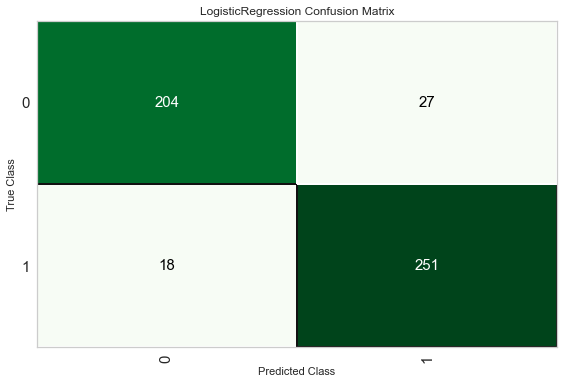

In [32]:
ridge = create_model('ridge')
plot_model(lr, "confusion_matrix")

#### LogisticRegression Confusion Matrix!

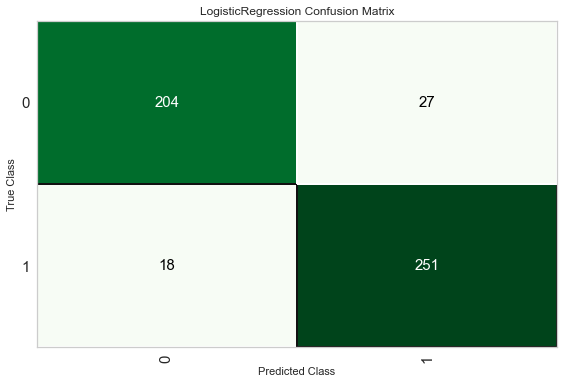

In [31]:
lr = create_model('lr')
plot_model(lr, "confusion_matrix")

#### XGBoost Confusion Matrix!

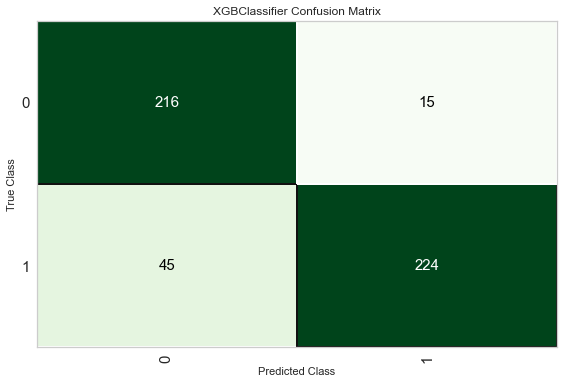

In [29]:
Xgb = create_model('xgboost')
plot_model(Xgb, "confusion_matrix")

#### LightGBM Confusion Matrix!

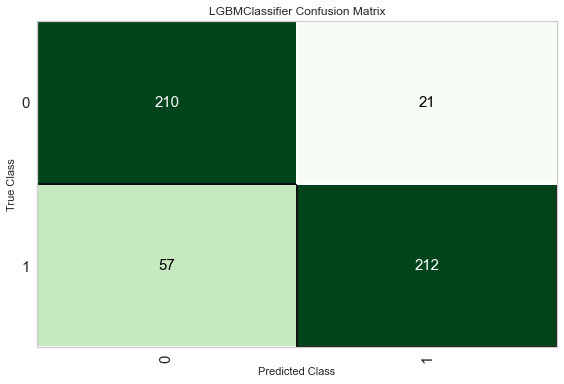

In [30]:
lightGbm = create_model('lightgbm')
plot_model(lightGbm, "confusion_matrix")